In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### READ CSV

In [1]:
attention_df = pd.read_csv('/Users/noah/Desktop/attention_output (1).csv').sort_values(by='timestamp').reset_index()
attention_df

NameError: name 'pd' is not defined

In [162]:
num_people = attention_df["face_idx"].nunique()
num_people

11

### PEOPLE DETECTION ANALYSIS

In [163]:
grouped_df = attention_df.groupby('timestamp')[['face_idx']].count().reset_index()
grouped_df

,timestamp,face_idx
0,300,10
1,310,10
2,320,10
3,330,9
4,340,9
...,...,...
295,3250,10
296,3260,10
297,3270,10
298,3280,9


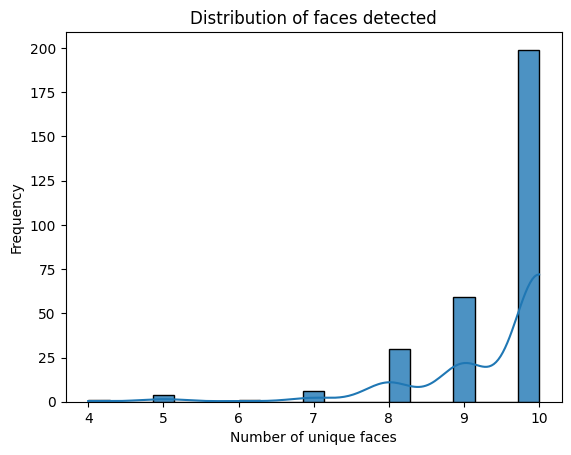

In [164]:
sns.histplot(x=grouped_df['face_idx'], data="grouped_df", kde=True, bins='auto', stat="count", alpha=0.8)
plt.xlabel("Number of unique faces")
plt.ylabel("Frequency")
plt.title("Distribution of faces detected")
plt.show()

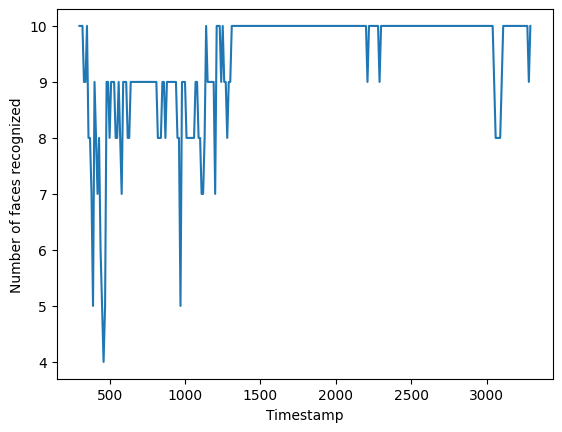

In [165]:
plt.plot("timestamp", "face_idx", data=grouped_df)
plt.xlabel("Timestamp")
plt.ylabel("Number of faces recognized")
plt.show()

In [166]:
## TODO: CHECK OUT THIS SEGMENT AND DECIDE WHY ITS POOR AT FIRST

### PEOPLE RECOGNIZATION ANALYSIS

Summary statistics for recognition prediction:
count     2207
unique      12
top       Noah
freq       292
Name: recognition_prediction, dtype: object


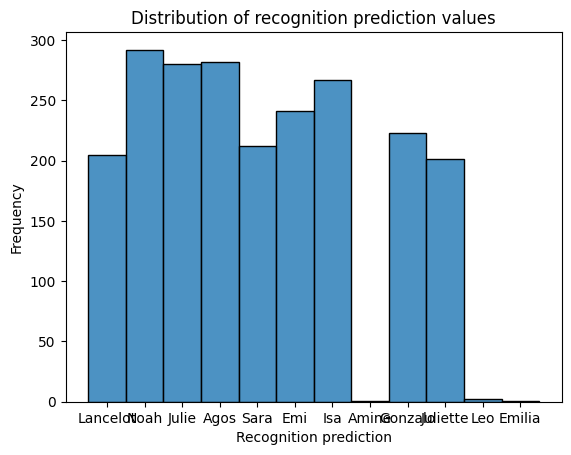

In [167]:
print("Summary statistics for recognition prediction:")
print(attention_df["recognition_prediction"].describe())

# create a histogram plot of recognition prediction values
sns.histplot(data=attention_df, x="recognition_prediction", bins=20, alpha=0.8)
plt.xlabel("Recognition prediction")
plt.ylabel("Frequency")
plt.title("Distribution of recognition prediction values")
plt.show()

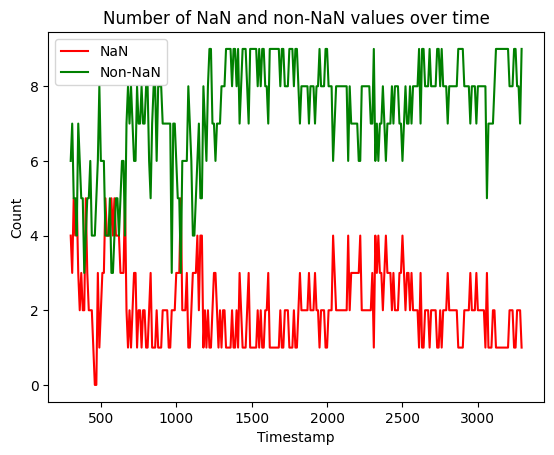

In [168]:
grouped_df = attention_df.groupby(["timestamp"])

# count the number of NaN and non-NaN values for the recognition prediction column
count_df = grouped_df.agg({"recognition_prediction": [lambda x: x.isna().sum(), lambda x: x.notna().sum()]})
count_df.columns = ["num_nan", "num_not_nan"]
count_df.reset_index(inplace=True)

sns.lineplot(x="timestamp", y="num_nan", data=count_df, color="red", label="NaN")
sns.lineplot(x="timestamp", y="num_not_nan", data=count_df, color="green", label="Non-NaN")

# add axis labels and a legend
plt.xlabel("Timestamp")
plt.ylabel("Count")
plt.title("Number of NaN and non-NaN values over time")
plt.legend(loc="upper left")

# display the plot
plt.show()

In [169]:
attention_df["recognition_prediction"].value_counts(normalize=True, dropna=False)

NaN         0.220967
Noah        0.103071
Agos        0.099541
Julie       0.098835
Isa         0.094246
Emi         0.085069
Gonzalo     0.078715
Sara        0.074832
Lancelot    0.072361
Juliette    0.070950
Leo         0.000706
Amine       0.000353
Emilia      0.000353
Name: recognition_prediction, dtype: float64

In [170]:
### TODO: CHECK BEGINNING OF VIDEO TO DETERMINE WHY IT DOES NOT RECOGNIZE FACES 
# - LIKELY CAUSE IS FACE DETECTION, WHICH APPEARS LOW AT FIRST

#### INVESTIGATE NANs

In [171]:
nan_df = attention_df[attention_df["recognition_prediction"].isna()]

# print the other features in the DataFrame for these rows
print(nan_df.drop(columns=["recognition_prediction"]))

                frame  timestamp  face_idx  recognition_distance  attentive  \
1      Midbatch_ds300        300         1                  0.76       True   
6      Midbatch_ds300        300         6                   NaN      False   
7      Midbatch_ds300        300         7                   NaN      False   
8      Midbatch_ds300        300         8                   NaN      False   
11     Midbatch_ds310        310         1                  0.72       True   
...               ...        ...       ...                   ...        ...   
2804  Midbatch_ds3270       3270         0                  0.73       True   
2811  Midbatch_ds3270       3270         7                   NaN      False   
2814  Midbatch_ds3280       3280         1                  0.68       True   
2820  Midbatch_ds3280       3280         7                   NaN      False   
2823  Midbatch_ds3290       3290         0                  0.75       True   

     left_prediction  left_score right_prediction  

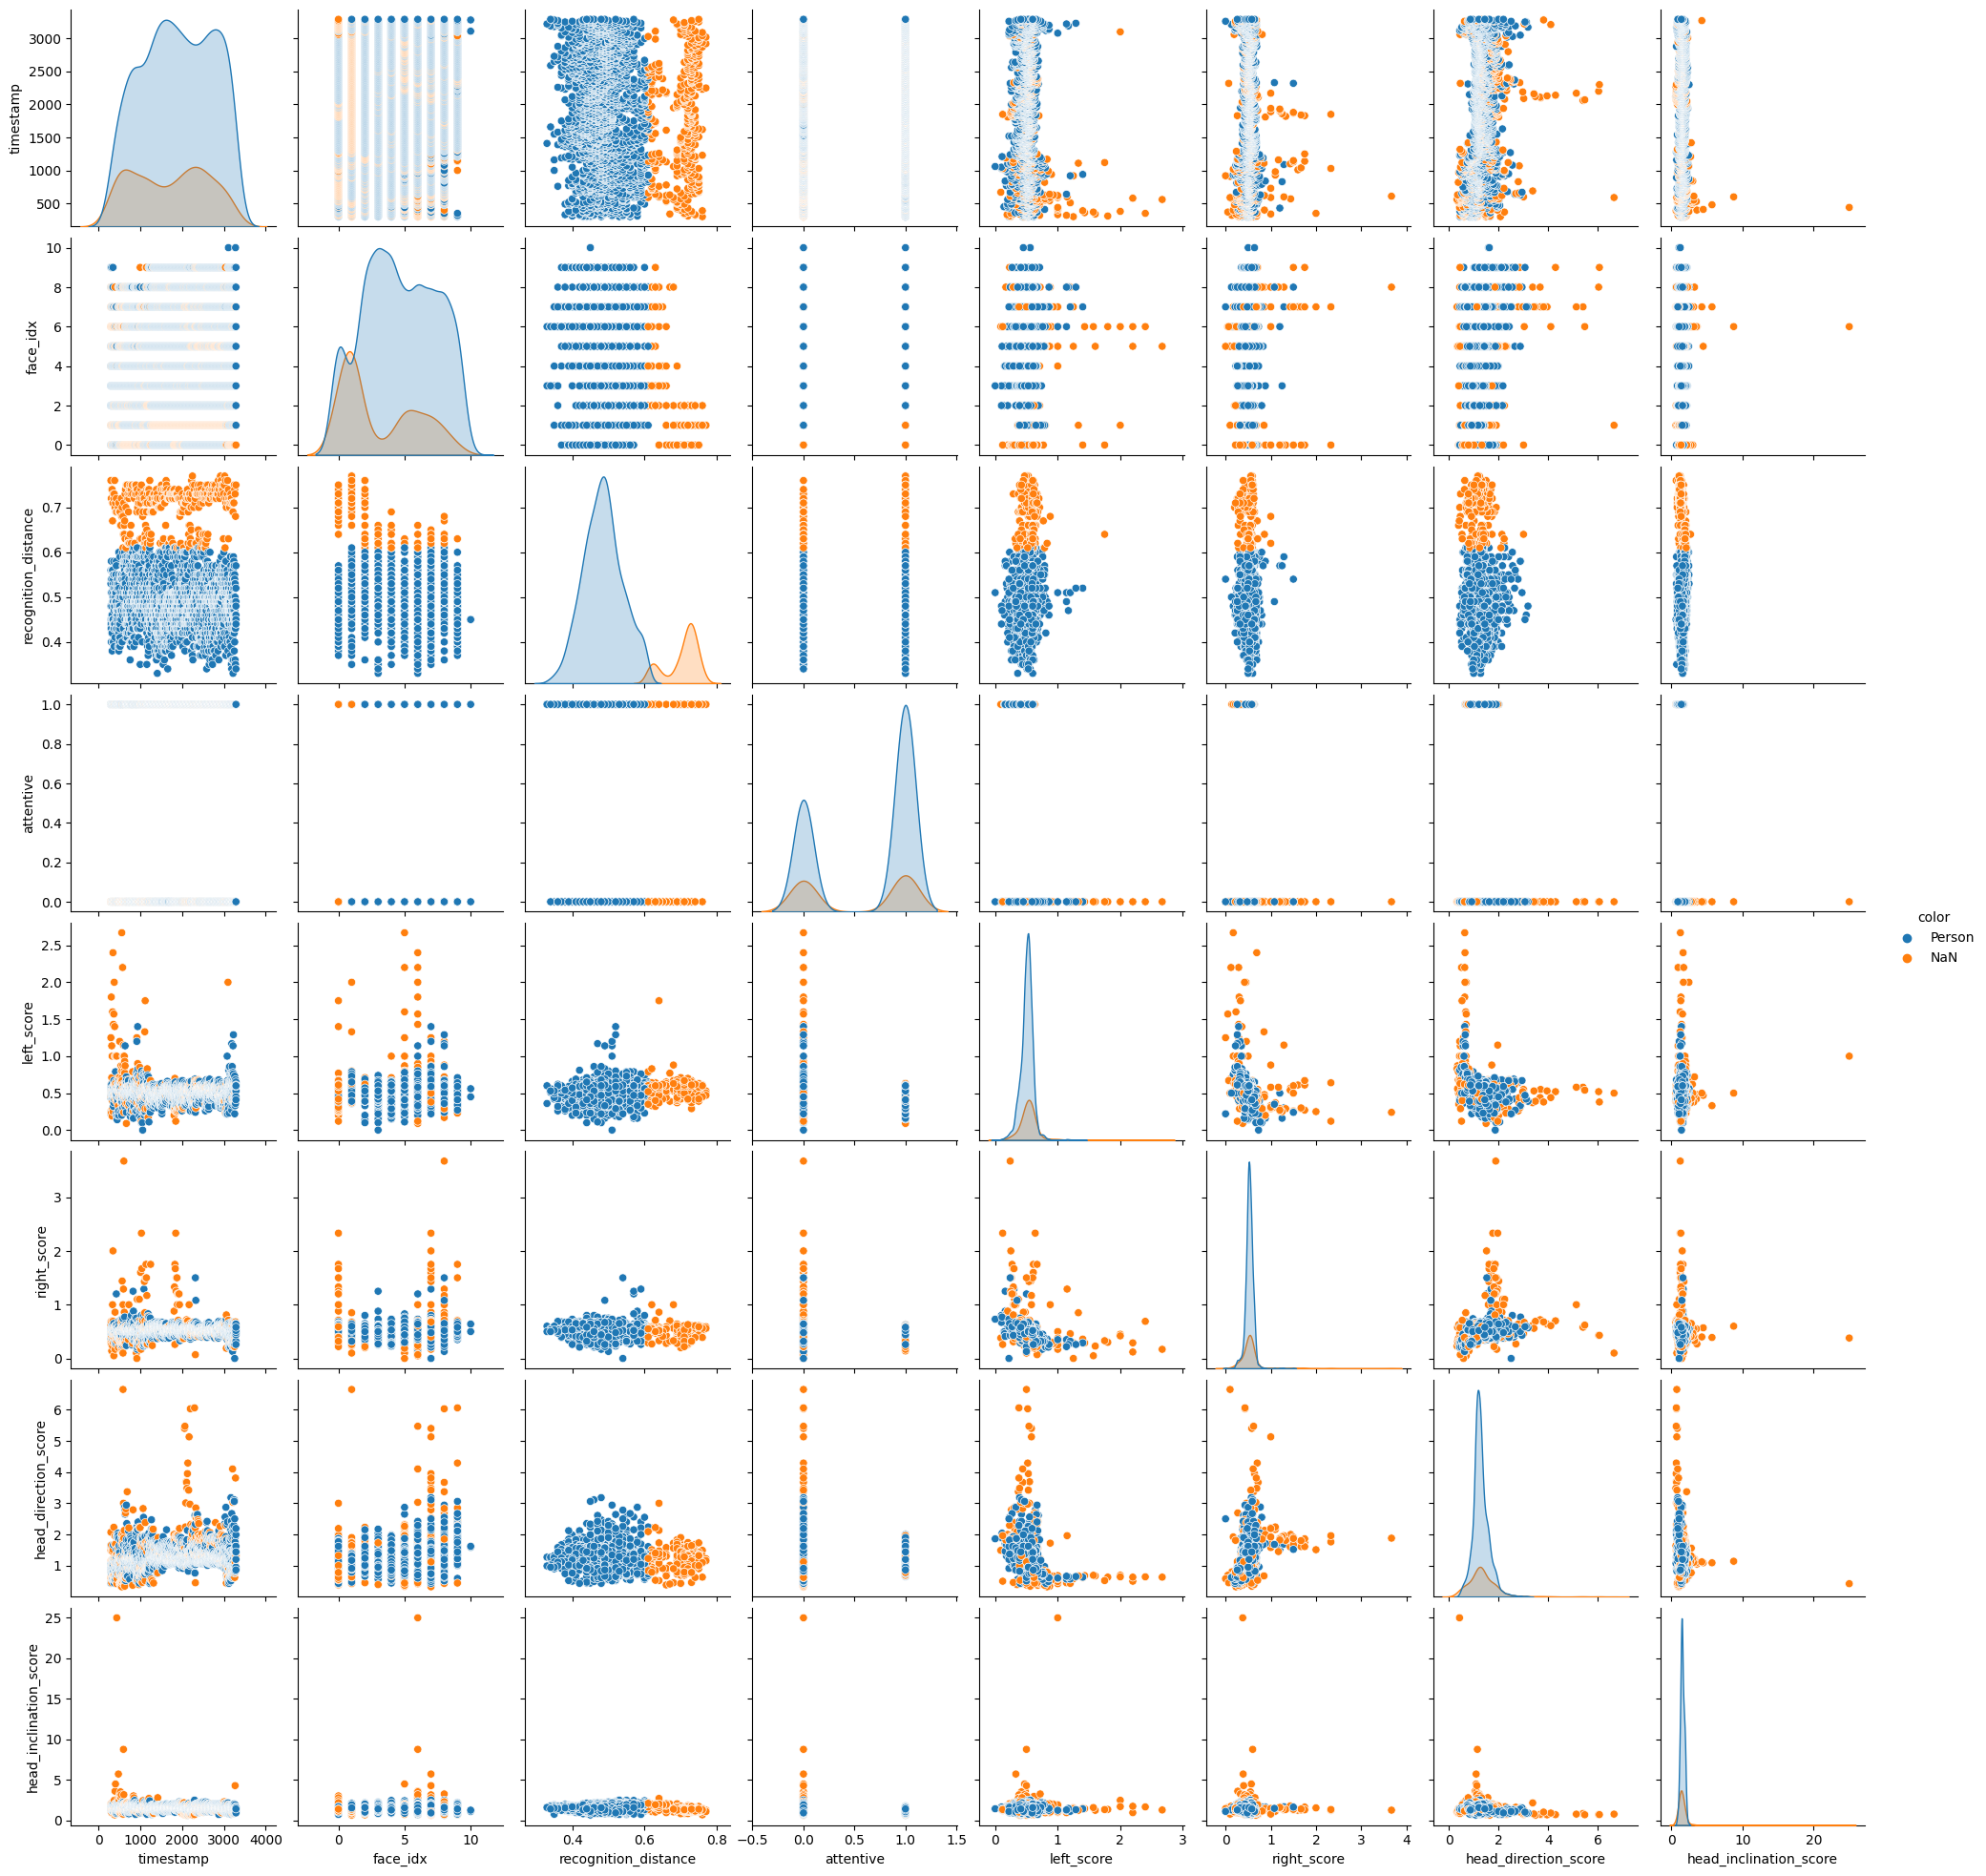

In [172]:
attention_df['color'] = np.where(attention_df['recognition_prediction'].isna(), 'NaN', 'Person')

# create a pair plot of all variables in the DataFrame
sns.pairplot(data=attention_df, hue='color')

Text(0.5, 1.0, 'Number of occurrences of each recognition_prediction value')

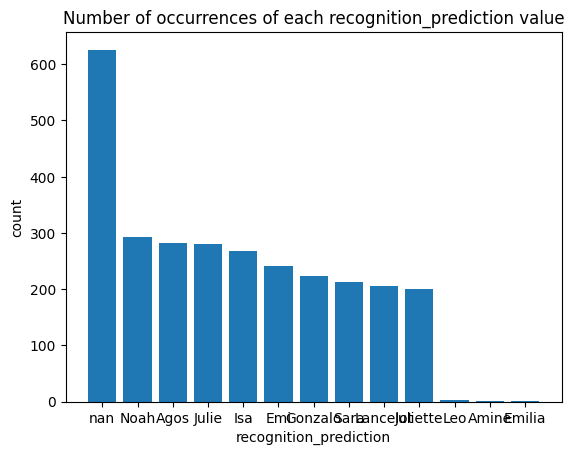

In [173]:
# count the number of occurrences of each value of the recognition_prediction column
value_counts = attention_df["recognition_prediction"].value_counts(dropna=False)

# create a bar plot of the value counts
plt.bar(value_counts.index.astype(str), value_counts.values)

# add labels and title to the plot
plt.xlabel("recognition_prediction")
plt.ylabel("count")
plt.title("Number of occurrences of each recognition_prediction value")


In [174]:
# create a boolean mask for rows where recognition_prediction is NaN
nan_mask = attention_df["recognition_prediction"].isna()

# create a cumulative sum of the NaN mask
nan_sum = nan_mask.cumsum()

# group the DataFrame by the NaN sum and find the start and end indices of each group
nan_groups = attention_df.groupby(nan_sum)
nan_start = nan_groups.first().index
nan_end = nan_groups.last().index

# print the start and end indices of each NaN sequence
for i in range(len(nan_start)):
    print("NaN sequence", i+1, "starts at index", nan_start[i], "and ends at index", nan_end[i])


NaN sequence 1 starts at index 0 and ends at index 0
NaN sequence 2 starts at index 1 and ends at index 1
NaN sequence 3 starts at index 2 and ends at index 2
NaN sequence 4 starts at index 3 and ends at index 3
NaN sequence 5 starts at index 4 and ends at index 4
NaN sequence 6 starts at index 5 and ends at index 5
NaN sequence 7 starts at index 6 and ends at index 6
NaN sequence 8 starts at index 7 and ends at index 7
NaN sequence 9 starts at index 8 and ends at index 8
NaN sequence 10 starts at index 9 and ends at index 9
NaN sequence 11 starts at index 10 and ends at index 10
NaN sequence 12 starts at index 11 and ends at index 11
NaN sequence 13 starts at index 12 and ends at index 12
NaN sequence 14 starts at index 13 and ends at index 13
NaN sequence 15 starts at index 14 and ends at index 14
NaN sequence 16 starts at index 15 and ends at index 15
NaN sequence 17 starts at index 16 and ends at index 16
NaN sequence 18 starts at index 17 and ends at index 17
NaN sequence 19 start

In [175]:
import statistics

nan_lengths = (nan_end - nan_start).tolist()
average_length = statistics.mean(nan_lengths)
print("Average length of NaN sequences:", average_length)

Average length of NaN sequences: 0


In [176]:
nan_df = attention_df.loc[attention_df['recognition_prediction'].isna()]
nan_df["attentive"].value_counts()

True     338
False    288
Name: attentive, dtype: int64

### ATTENTION ANALYSIS

#### OVERALL TREND

In [177]:
attention_df["attentive"].value_counts(normalize=True)

True     0.624779
False    0.375221
Name: attentive, dtype: float64

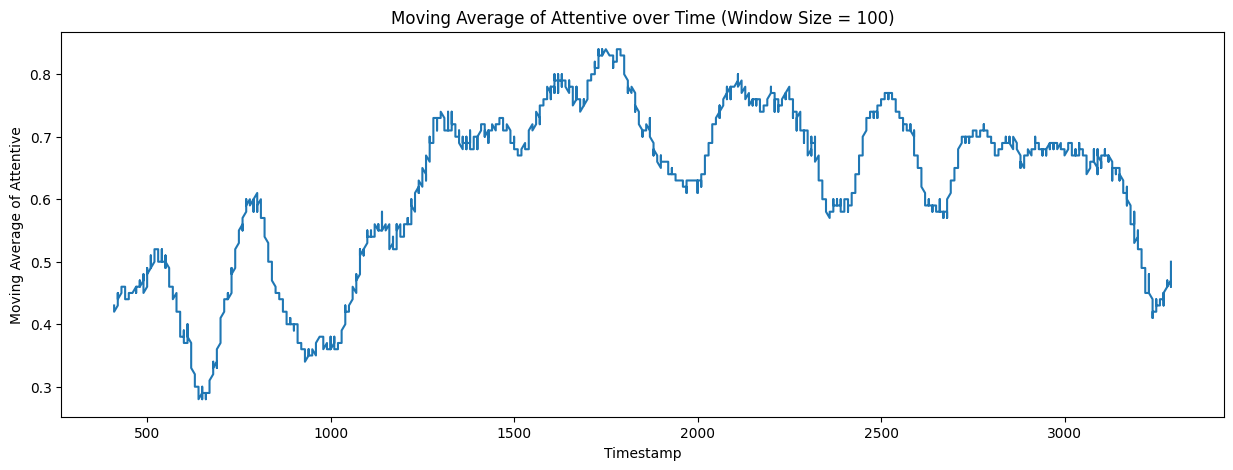

In [178]:
window_size = 100

# calculate the moving average of the 'attentive' column
rolling_avg = attention_df['attentive'].rolling(window=window_size).mean()

# create a line plot of the moving average
plt.figure(figsize=(15,5))
plt.plot(attention_df['timestamp'], rolling_avg)
plt.xlabel('Timestamp')
plt.ylabel('Moving Average of Attentive')
plt.title(f'Moving Average of Attentive over Time (Window Size = {window_size})')
plt.show()

#### TREND PER PERSON

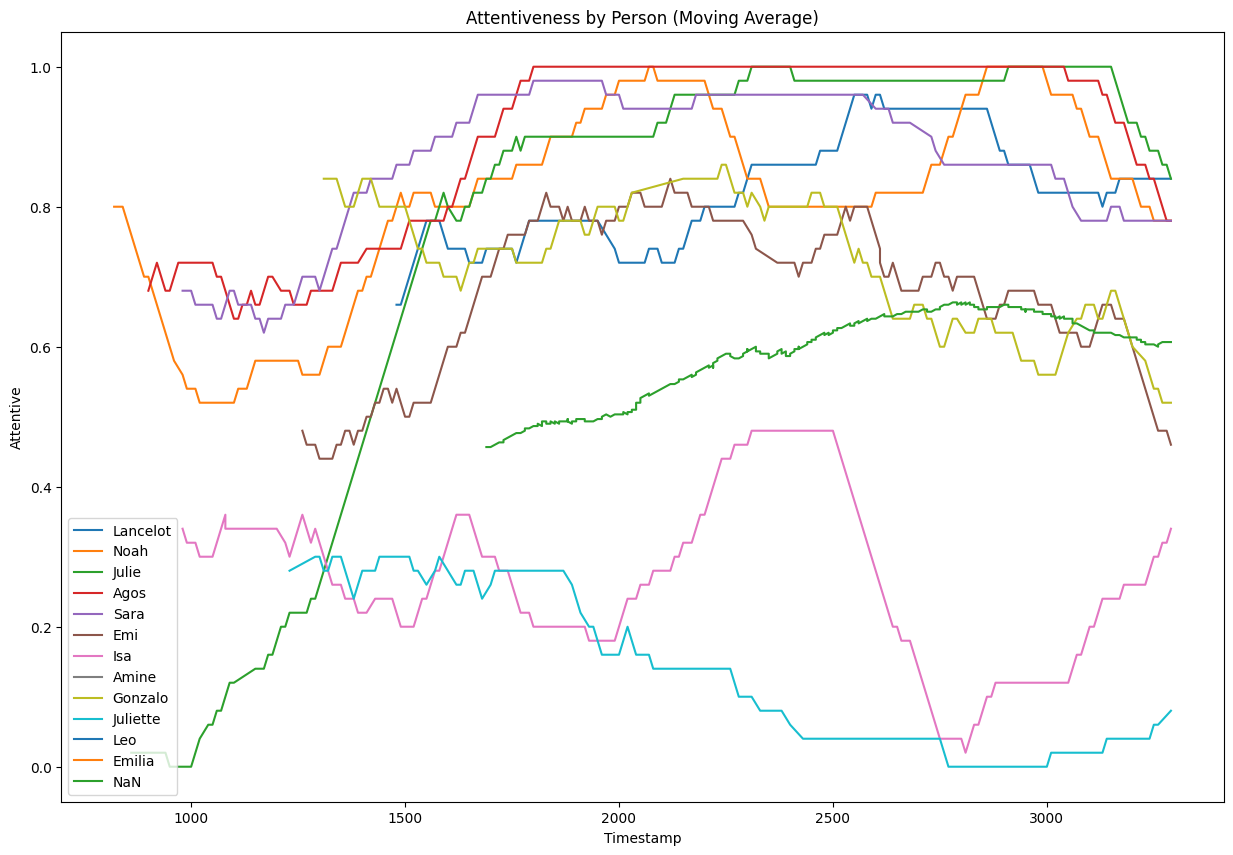

In [179]:
window_size_pp = 50
# create a list of unique values in the recognition_prediction column
unique_values = attention_df["recognition_prediction"].unique()

plt.figure(figsize=(15, 10))

# plot the rolling mean of the attentive column for each unique value in the recognition_prediction column
for value in unique_values:
    if pd.notna(value):
        df = attention_df[attention_df["recognition_prediction"] == value]
        rolling = df["attentive"].rolling(window=window_size_pp).mean()
        plt.plot(df["timestamp"], rolling, label=value)

# create a separate DataFrame with only NaN values
nan_df = attention_df[attention_df["recognition_prediction"].isna()]

# plot the rolling mean of the attentive column for NaN values
rolling_mean = nan_df["attentive"].rolling(window=300).mean()
plt.plot(nan_df["timestamp"], rolling_mean, label="NaN")

# set the plot title and axis labels
plt.title("Attentiveness by Person (Moving Average)")
plt.xlabel("Timestamp")
plt.ylabel("Attentive")

# add a legend to the plot
plt.legend()

# show the plot
plt.show()


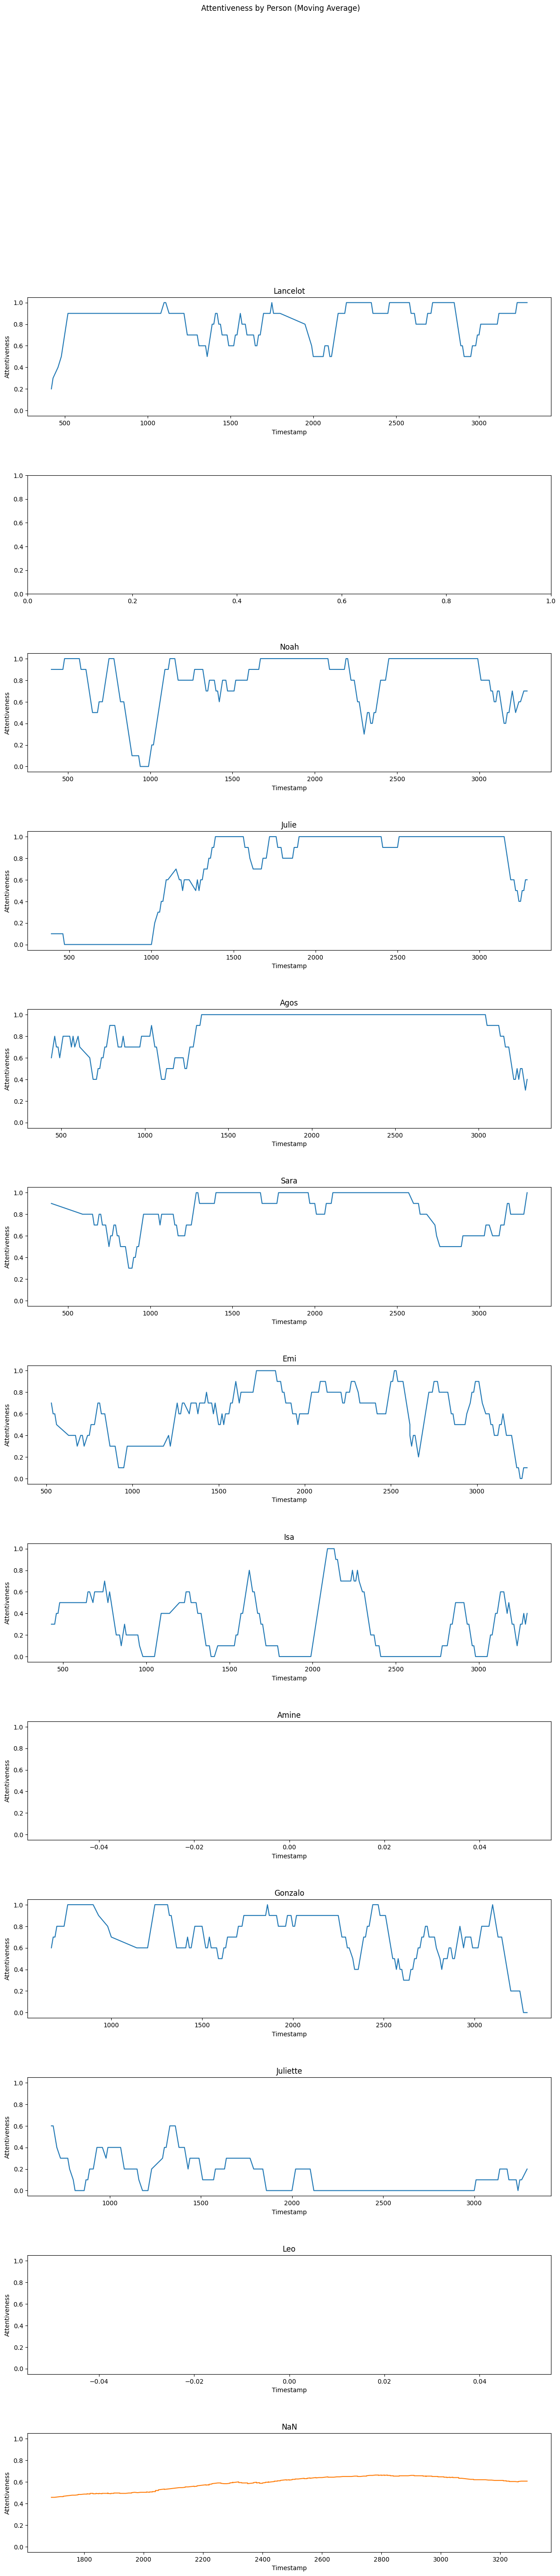

In [180]:
# SUBPLOT
window_size_pp = 10

# create a list of unique values in the recognition_prediction column
unique_values = attention_df["recognition_prediction"].unique()

# create a grid of subplots with one row and one column per unique value
fig, axs = plt.subplots(len(unique_values), 1, figsize=(15, 5*len(unique_values)))

# plot the rolling mean of the attentive column for each unique value in the recognition_prediction column
for i, value in enumerate(unique_values):
    if pd.notna(value):
        df = attention_df[attention_df["recognition_prediction"] == value]
        rolling = df["attentive"].rolling(window=window_size_pp).mean()
        axs[i].plot(df["timestamp"], rolling)
        axs[i].set_title(value)
        axs[i].set_ylim(-0.05,1.05)
        axs[i].set_xlabel("Timestamp")
        axs[i].set_ylabel("Attentiveness")
        
# plot the rolling mean of the attentive column for NaN values
nan_df = attention_df[attention_df["recognition_prediction"].isna()]
rolling_mean = nan_df["attentive"].rolling(window=300).mean()
axs[len(unique_values)-1].plot(nan_df["timestamp"], rolling_mean)
axs[len(unique_values)-1].set_title("NaN")
axs[len(unique_values)-1].set_ylim(-0.05,1.05)
axs[len(unique_values)-1].set_xlabel("Timestamp")
axs[len(unique_values)-1].set_ylabel("Attentiveness")

# set the plot title and axis labels
fig.suptitle("Attentiveness by Person (Moving Average)")

# adjust the spacing between subplots
fig.subplots_adjust(hspace=0.5)

# show the plot
plt.show()

/Users/noah/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/noah/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


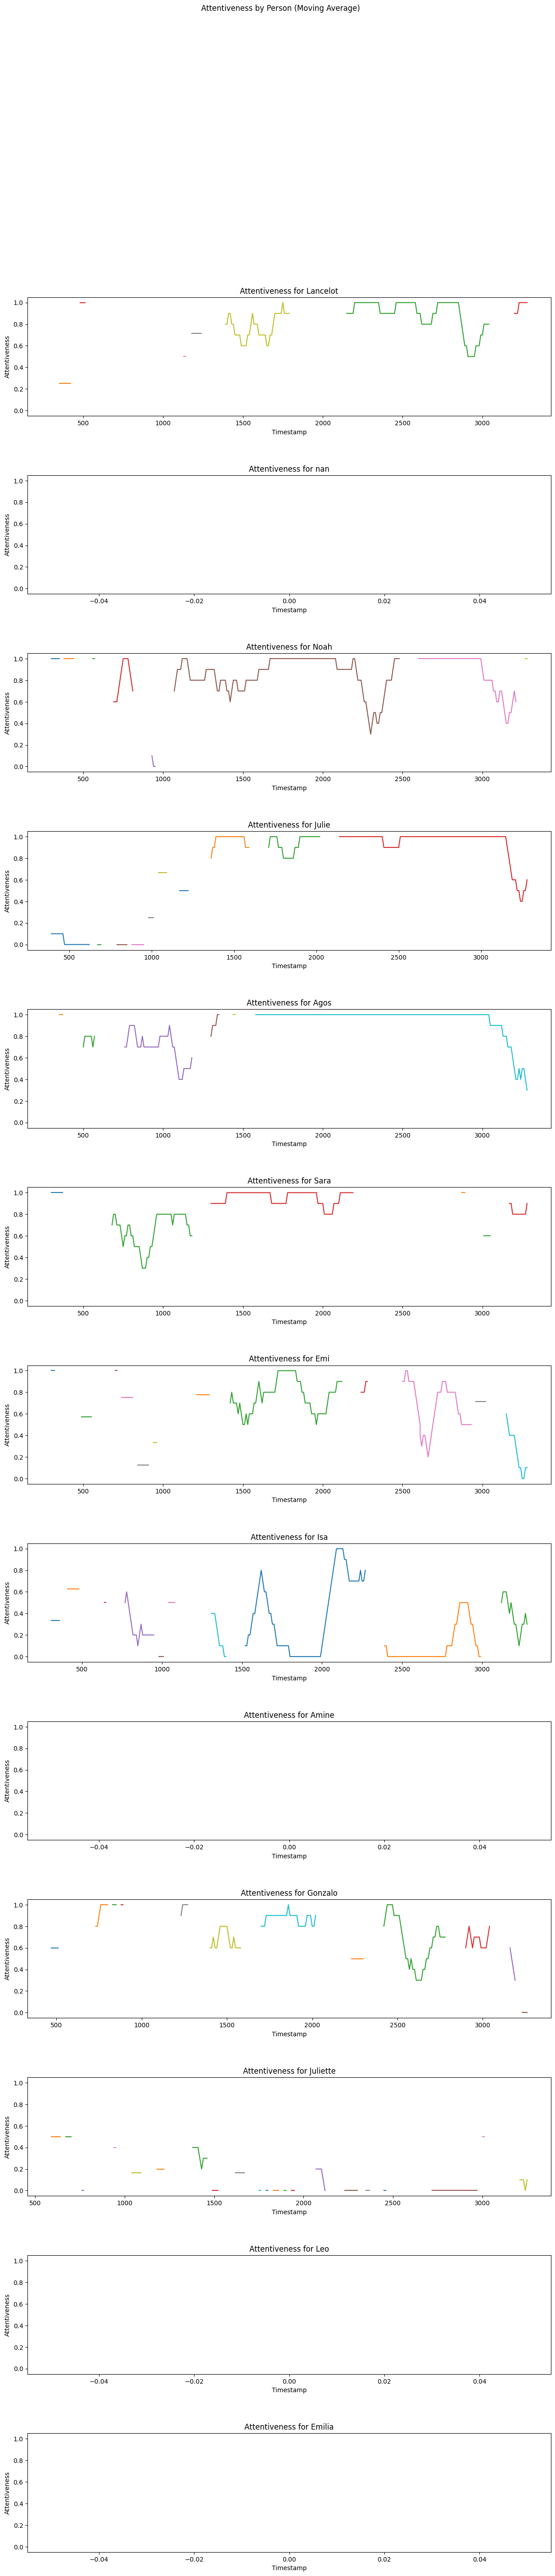

In [181]:
# SUBPLOTS FOR EACH PERSON BUT NOT CONTINUOUS

window_size_pp = 10
min_timestamp_gap = 15

unique_values = attention_df["recognition_prediction"].unique()

fig, axs = plt.subplots(len(unique_values), 1, figsize=(15, 5*len(unique_values)))

for i, person_name in enumerate(unique_values):
    # create a DataFrame containing only rows where the person is recognized
    person_df = attention_df[attention_df["recognition_prediction"] == person_name]
    
    # get the timestamps and attentive scores for the person
    timestamps = person_df["timestamp"].values
    attentive_scores = person_df["attentive"].values
    
    # initialize variables to keep track of the start and end indices for each segment
    start_idx = 0
    end_idx = 0
    
    # iterate over the timestamps to find contiguous segments of data
    for j in range(1, len(timestamps)):
        # if the current timestamp is more than min_timestamp_gap away from the previous one, start a new segment
        if timestamps[j] - timestamps[j-1] > min_timestamp_gap:
            end_idx = j-1
            # if the segment is longer than the window size, plot a rolling mean of the attentive scores
            if end_idx - start_idx > window_size_pp:
                segment_timestamps = timestamps[start_idx:end_idx]
                segment_attentive_scores = attentive_scores[start_idx:end_idx]
                rolling_mean = pd.Series(segment_attentive_scores).rolling(window=window_size_pp).mean()
                axs[i].plot(segment_timestamps, rolling_mean, label=person_name)
            else:
                # if the segment is shorter than the window size, plot the mean attentiveness as a straight line
                segment_timestamps = timestamps[start_idx:end_idx]
                segment_attentive_scores = attentive_scores[start_idx:end_idx]
                mean_attentive = np.mean(segment_attentive_scores)
                axs[i].plot(segment_timestamps, [mean_attentive]*len(segment_timestamps), label=person_name)
            # update the start index for the next segment
            start_idx = j
    
    # plot the final segment
    end_idx = len(timestamps) - 1
    if end_idx - start_idx > window_size_pp:
        segment_timestamps = timestamps[start_idx:end_idx]
        segment_attentive_scores = attentive_scores[start_idx:end_idx]
        rolling_mean = pd.Series(segment_attentive_scores).rolling(window=window_size_pp).mean()
        axs[i].plot(segment_timestamps, rolling_mean, label=person_name)
    else:
        segment_timestamps = timestamps[start_idx:end_idx]
        segment_attentive_scores = attentive_scores[start_idx:end_idx]
        mean_attentive = np.mean(segment_attentive_scores)
        axs[i].plot(segment_timestamps, [mean_attentive]*len(segment_timestamps), label=person_name)

    
    axs[i].set_title(f"Attentiveness for {person_name}")
    axs[i].set_xlabel("Timestamp")
    axs[i].set_ylabel("Attentiveness")
    axs[i].set_ylim(-0.05, 1.05)
    
fig.suptitle("Attentiveness by Person (Moving Average)")
fig.subplots_adjust(hspace=0.5)

plt.show()


#### DRIVERS FOR INNATENTIVENESS

In [182]:

sns.pairplot(data=attention_df, hue='color')

In [ ]:
attention_df.head(3)

,frame,timestamp,face_idx,recognition_prediction,recognition_distance,attentive,left_prediction,left_score,right_prediction,right_score,head_direction_prediction,head_direction_score,head_inclination_prediction,head_inclination_score,color
0,Midbatch_ds300,300,0,Lancelot,0.48,False,straight,0.44,straight,0.36,head left,0.44,head level,1.26,Person
1,Midbatch_ds300,300,1,NaN,0.76,True,straight,0.50,straight,0.50,head centered,1.12,head level,1.44,NaN
2,Midbatch_ds300,300,2,Noah,0.53,True,straight,0.53,straight,0.50,head centered,0.87,head level,1.70,Person


In [ ]:
def is_attentive(left_eye_direction: str, right_eye_direction: str, head_direction: str, head_inclination: str) -> str:
    '''Determines the reason for inattentiveness based on the eyes' and head's directions'''
    
    if head_inclination == 'head down':
        return 'innatentive due to head down'
    elif left_eye_direction == 'straight' and right_eye_direction == 'straight' and head_direction == 'head right':
        return 'innatentive due to head right'
    elif left_eye_direction == 'straight' and right_eye_direction == 'straight' and head_direction == 'head left':
        return 'innatentive due to head left'
    elif left_eye_direction == 'sideway' and right_eye_direction == 'straight' and head_direction == 'head centered':
        return 'innatentive due to left eye sideways'
    elif left_eye_direction == 'straight' and right_eye_direction == 'sideway' and head_direction == 'head centered':
        return 'innatentive due to right eye sideways'
    elif left_eye_direction == 'sideway' and right_eye_direction == 'straight' and head_direction == 'head left':
        return 'innatentive due to left eye sideways and head turned left'
    elif left_eye_direction == 'straight' and right_eye_direction == 'sideway' and head_direction == 'head right':
        return 'innatentive due to right eye sideways and head turned right'
    elif left_eye_direction == 'sideway' and right_eye_direction == 'sideway' and head_direction == 'head centered':
        return 'innatentive due to right and left eye sideways'
    elif left_eye_direction == 'straight' and right_eye_direction == 'straight' and head_direction == 'head centered':
        return 'Attentive'
    elif left_eye_direction == 'sideways' and head_direction == 'head right':
        return 'Attentive'
    elif right_eye_direction == 'sideways' and head_direction == 'head left':
        return 'Attentive'

# create a new column called "inattentive_reason" that applies the is_attentive function to each row
attention_df['inattentive_reason'] = attention_df.apply(lambda x: is_attentive(x['left_prediction'], x['right_prediction'], x['head_direction_prediction'], x['head_inclination_prediction']), axis=1)

In [ ]:
unique_inattentive_reason = attention_df["inattentive_reason"].unique()

for reason in unique_inattentive_reason:
    df = attention_df[attention_df["inattentive_reason"] == reason]
    reason_dataframe = df["recognition_prediction"].value_counts(dropna=False)
    print(f"Reason for inattentiveness: {reason}")
    print(reason_dataframe)


Reason for inattentiveness: innatentive due to head left
NaN         23
Lancelot     9
Isa          5
Agos         3
Gonzalo      3
Sara         2
Emi          1
Name: recognition_prediction, dtype: int64
Reason for inattentiveness: Attentive
NaN         338
Agos        242
Noah        236
Julie       197
Sara        175
Lancelot    166
Gonzalo     155
Emi         151
Isa          77
Juliette     32
Emilia        1
Name: recognition_prediction, dtype: int64
Reason for inattentiveness: innatentive due to head down
Juliette    154
Isa         152
NaN         122
Julie        80
Noah         55
Gonzalo      26
Sara         24
Emi           9
Agos          6
Lancelot      6
Name: recognition_prediction, dtype: int64
Reason for inattentiveness: innatentive due to right eye sideways
NaN         32
Gonzalo     26
Emi         24
Lancelot    21
Isa         17
Agos        15
Sara         6
Juliette     2
Amine        1
Leo          1
Name: recognition_prediction, dtype: int64
Reason for inattent

In [ ]:
attention_df['inattentive_reason'].value_counts()

Attentive                                                      1770
innatentive due to head down                                    634
innatentive due to right eye sideways                           145
innatentive due to left eye sideways                             77
innatentive due to head right                                    67
innatentive due to left eye sideways and head turned left        51
innatentive due to head left                                     46
innatentive due to right eye sideways and head turned right      25
innatentive due to right and left eye sideways                    6
Name: inattentive_reason, dtype: int64

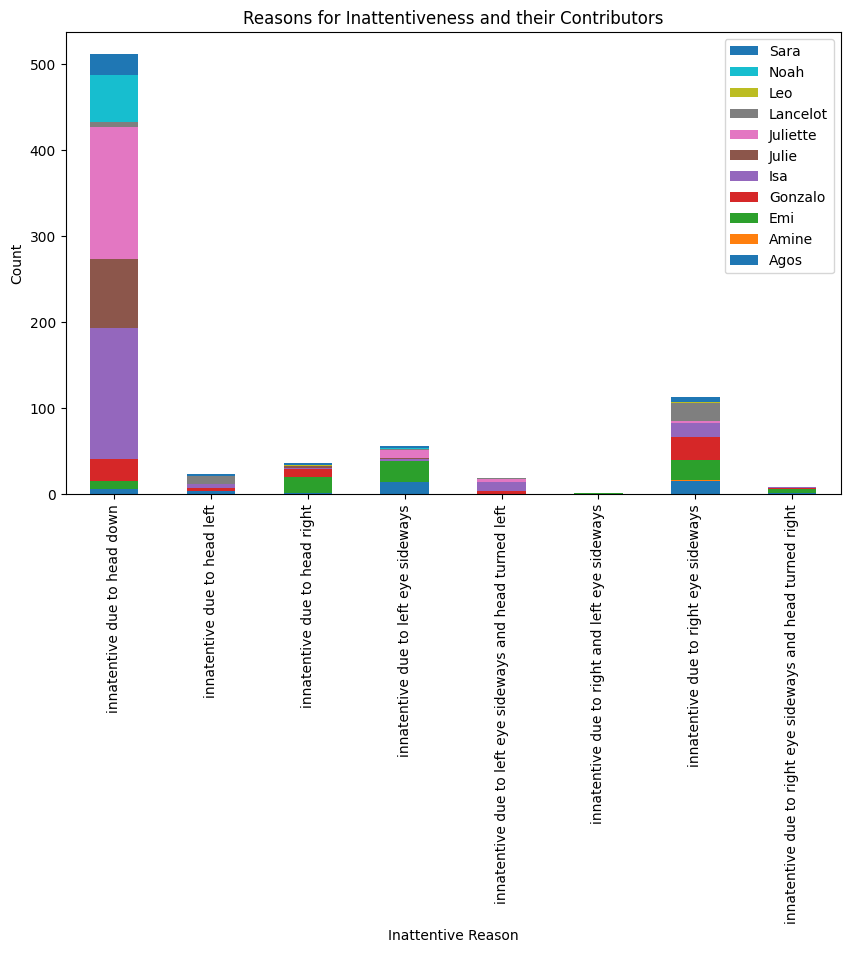

In [ ]:
# get the count of each person contributing to each reason for inattentiveness
reason_person_counts = attention_df[attention_df['inattentive_reason'] != 'Attentive'].groupby(['inattentive_reason', 'recognition_prediction']).size().unstack()


# create a stacked bar chart of the reason_person_counts
fig, ax = plt.subplots(figsize=(10, 6))
reason_person_counts.plot(kind='bar', stacked=True, ax=ax)

# add labels and title
ax.set_xlabel('Inattentive Reason')
ax.set_ylabel('Count')
ax.set_title('Reasons for Inattentiveness and their Contributors')

# add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.show()


### ATTENTION METRICS - IDEAS FOR WEBSITE

#### Average attention span

In [ ]:
min_timestamp_gap = 15
min_consecutive_attentive = 2

# group the DataFrame by person and iterate over each person's data
grouped = attention_df.groupby("recognition_prediction")
overall_attentiveness_span = []
overall_inattentiveness_span = []

for name, group in grouped:
    attentive_times = []
    inattentive_times = []
    attentive_duration = 0
    inattentive_duration = 0
    last_attentive = False
    last_timestamp = None
    for i, row in group.iterrows():
        # check if this is the first row for this person
        if last_timestamp is None:
            last_timestamp = row["timestamp"]
            last_attentive = row["attentive"]
            continue
        
        # calculate the time difference between this timestamp and the last one
        time_diff = row["timestamp"] - last_timestamp
        
        # check if this timestamp is part of the same segment as the previous one
        if row["attentive"] == last_attentive and time_diff <= min_timestamp_gap:
            # add the time difference to the current segment duration
            if row["attentive"]:
                attentive_duration += time_diff
            else:
                inattentive_duration += time_diff
        else:
            # this timestamp marks the start of a new segment
            if last_attentive:
                attentive_times.append(attentive_duration)
            else:
                inattentive_times.append(inattentive_duration)
            attentive_duration = 0
            inattentive_duration = 0
        
        # update the last_attentive and last_timestamp variables
        last_attentive = row["attentive"]
        last_timestamp = row["timestamp"]
    
    # calculate the average attentive and inattentive durations
    if attentive_times:
        avg_attentive_duration = sum(attentive_times) / len(attentive_times)
        print(f"Average attention span for {name}: {avg_attentive_duration:.2f} seconds")
    else:
        print(f"No attentive segments found for {name}")
    
    overall_attentiveness_span.append(avg_attentive_duration)
        
    if inattentive_times:
        avg_inattentive_duration = sum(inattentive_times) / len(inattentive_times)
        print(f"Average inattention span for {name}: {avg_inattentive_duration:.2f} seconds")
    else:
        print(f"No inattentive segments found for {name}") 
    
    overall_inattentiveness_span.append(avg_inattentive_duration)

average_att_span = sum(overall_attentiveness_span) / len(overall_attentiveness_span)
avereage_inatt_span = sum(overall_inattentiveness_span) / len(overall_inattentiveness_span)

print(f"average_att_span = {average_att_span} seconds")
print(f"avereage_inatt_span = {avereage_inatt_span} seconds")

Average attention span for Agos: 82.69 seconds
Average inattention span for Agos: 5.38 seconds
No attentive segments found for Amine
No inattentive segments found for Amine
Average attention span for Emi: 24.09 seconds
Average inattention span for Emi: 7.06 seconds
No attentive segments found for Emilia
No inattentive segments found for Emilia
Average attention span for Gonzalo: 29.74 seconds
Average inattention span for Gonzalo: 7.63 seconds
Average attention span for Isa: 12.35 seconds
Average inattention span for Isa: 36.34 seconds
Average attention span for Julie: 83.81 seconds
Average inattention span for Julie: 20.37 seconds
Average attention span for Juliette: 5.50 seconds
Average inattention span for Juliette: 25.21 seconds
Average attention span for Lancelot: 45.56 seconds
Average inattention span for Lancelot: 5.60 seconds
No attentive segments found for Leo
Average inattention span for Leo: 0.00 seconds
Average attention span for Noah: 76.30 seconds
Average inattention span 